Tugas Modul 6

Tera Makna Pratiwi (24060122140102)
Lab C1

Principal Component Analysis

Load dataset

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [27]:
df = pd.read_csv('cars_clus.csv')
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


Standarisasi Data

In [28]:
# Menentukan fitur numerik yang akan digunakan untuk PCA
features = ['sales', 'resale', 'price', 'engine_s', 'horsepow', 'wheelbas',
            'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']

# Menggunakan variabel fitur sebagai data input
X = df.loc[:, features]

# Menangani nilai non-numerik dengan mengganti nilai seperti '$null$' menjadi NaN
X = X.replace({'$null$': np.nan})

# Menghapus baris yang memiliki nilai NaN pada fitur yang dipilih
X_cleaned = X.dropna()

# Pastikan semua data dalam fitur numerik (konversi ke float jika perlu)
X_cleaned = X_cleaned.astype(float)

# Melakukan standarisasi pada fitur
X_scaled = StandardScaler().fit_transform(X_cleaned)

Kode ini digunakan untuk mempersiapkan data numerik sebelum diterapkan PCA dengan langkah-langkah sebagai berikut: memilih fitur yang relevan dari DataFrame, mengganti nilai non-numerik seperti '$null$' dengan NaN, menghapus baris dengan nilai yang hilang, memastikan semua data diubah menjadi tipe numerik (float), dan melakukan standarisasi (normalisasi) menggunakan StandardScaler agar semua fitur memiliki skala yang sama.

Proyeksi PCA ke 2D

In [29]:
# Menerapkan PCA untuk mengurangi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2)

# Mentransformasi data X menjadi 2 komponen utama
principalComponents = pca.fit_transform(X_scaled)

# Membuat DataFrame baru yang memuat 2 komponen utama
principalDF = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Menggabungkan hasil PCA dengan label target (menggunakan kolom 'type' sebagai label)
# Pastikan kolom 'type' ada pada DataFrame asli
if 'type' in df.columns:
    finalDF = pd.concat([principalDF, df.loc[X_cleaned.index, ['type']]], axis=1)
else:
    raise KeyError("Kolom 'type' tidak ditemukan dalam DataFrame.")

# Menampilkan jumlah data untuk setiap kategori pada kolom 'type'
print(df['type'].value_counts())


type
0         116
1          41
$null$      2
Name: count, dtype: int64



Kode ini menerapkan analisis PCA untuk mengurangi dimensi data menjadi dua komponen utama, kemudian mentransformasi data yang telah distandarisasi (X_scaled) ke dalam dua komponen tersebut. Hasil transformasi ini disimpan dalam DataFrame baru yang memuat dua komponen utama. Selanjutnya, DataFrame ini digabungkan dengan kolom type (sebagai label target) dari DataFrame asli, memastikan bahwa kolom type ada sebelum penggabungan. Terakhir, kode ini menampilkan jumlah data untuk setiap kategori dalam kolom type menggunakan fungsi value_counts().

Visualisasi Proyeksi 2D

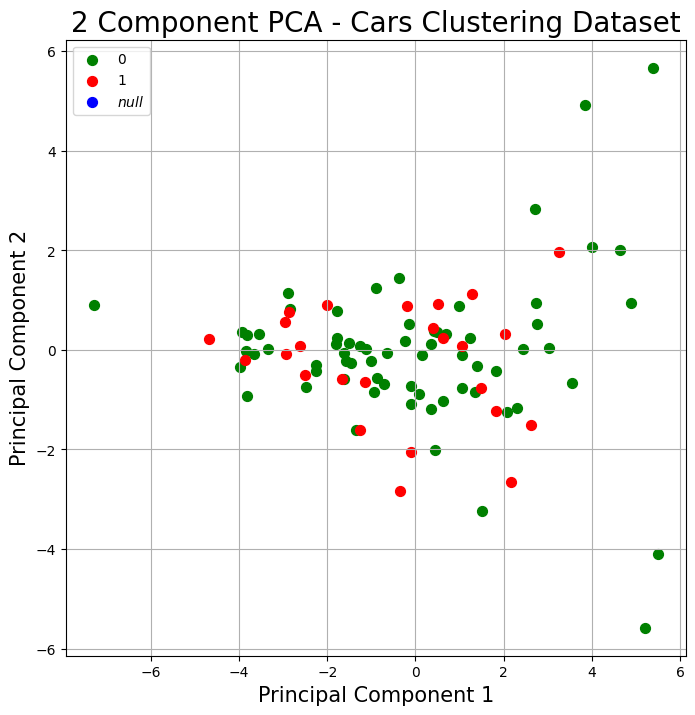

In [30]:
# Visualisasi 2D hasil PCA
fig = plt.figure(figsize=(8, 8)) # Membuat kanvas figure dengan ukuran 8x8 inci
ax = fig.add_subplot(1, 1, 1) # Menambahkan satu subplot dalam figure
ax.set_xlabel('Principal Component 1', fontsize=15) # Menambahkan label pada sumbu X
ax.set_ylabel('Principal Component 2', fontsize=15) # Menambahkan label pada sumbu Y

# Menambahkan judul pada plot
ax.set_title('2 Component PCA - Cars Clustering Dataset', fontsize=20)

# Menentukan target untuk warna plot
targets = df['type'].unique()  # Mengambil nilai unik dari kolom 'type' sebagai kategori target
colors = ['g', 'r', 'b', 'm', 'y', 'c']  # Warna untuk tiap kategori


# Loop untuk memplot data berdasarkan kategori target
for target, color in zip(targets, colors):  # Mengiterasi kategori dan warna
    indicesToKeep = finalDF['type'] == target # Menentukan indeks data yang sesuai dengan kategori

    # Membuat scatter plot untuk data yang sesuai dengan kategori
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'], # Data pada komponen utama 1
               finalDF.loc[indicesToKeep, 'principal component 2'], # Data pada komponen utama 2
               c=color, label=target, s=50)

# Menambahkan legenda untuk menunjukkan kategori
ax.legend(targets)
# Menambahkan grid pada plot untuk memperjelas posisi titik
ax.grid()

# Menampilkan plot
plt.show()


Kode ini digunakan untuk memvisualisasikan hasil PCA dalam bentuk plot 2D, di mana dua komponen utama digunakan sebagai sumbu X dan Y. Dimulai dengan membuat kanvas untuk plot, menambahkan label untuk kedua sumbu dan judul pada plot. Selanjutnya, kode ini mengambil nilai unik dari kolom type untuk mewarnai data berdasarkan kategori yang ada, dengan setiap kategori diberi warna yang berbeda. Setiap kategori diplot menggunakan scatter plot berdasarkan komponen utama yang telah dihitung, dan legenda serta grid ditambahkan untuk memudahkan interpretasi. Terakhir, plot ditampilkan dengan plt.show().

Varians yang dijelaskan

In [31]:
# Menampilkan variansi yang dijelaskan oleh setiap komponen utama
print("Explained variance ratio per component:")
print(pca.explained_variance_ratio_)


Explained variance ratio per component:
[0.5481677  0.22568975]



Kode ini digunakan untuk menampilkan rasio variansi yang dijelaskan oleh setiap komponen utama dalam analisis PCA. Setelah model PCA diterapkan, explained_variance_ratio_ memberikan proporsi variansi yang dapat dijelaskan oleh masing-masing komponen utama. Kode ini mencetak nilai tersebut untuk memberikan gambaran seberapa besar kontribusi setiap komponen terhadap keseluruhan variansi dalam data.